In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np

In [ ]:
csv_path='/content/jena_climate_2009_2016.csv'
df = pd.read_csv(csv_path)
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 00:10:00,996.52,-8.02,265.40,-8.90,93.30,3.33,3.11,0.22,1.94,3.12,1307.75,1.03,1.75,152.3
1,01.01.2009 00:20:00,996.57,-8.41,265.01,-9.28,93.40,3.23,3.02,0.21,1.89,3.03,1309.80,0.72,1.50,136.1
2,01.01.2009 00:30:00,996.53,-8.51,264.91,-9.31,93.90,3.21,3.01,0.20,1.88,3.02,1310.24,0.19,0.63,171.6
3,01.01.2009 00:40:00,996.51,-8.31,265.12,-9.07,94.20,3.26,3.07,0.19,1.92,3.08,1309.19,0.34,0.50,198.0
4,01.01.2009 00:50:00,996.51,-8.27,265.15,-9.04,94.10,3.27,3.08,0.19,1.92,3.09,1309.00,0.32,0.63,214.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420546,31.12.2016 23:20:00,1000.07,-4.05,269.10,-8.13,73.10,4.52,3.30,1.22,2.06,3.30,1292.98,0.67,1.52,240.0
420547,31.12.2016 23:30:00,999.93,-3.35,269.81,-8.06,69.71,4.77,3.32,1.44,2.07,3.32,1289.44,1.14,1.92,234.3
420548,31.12.2016 23:40:00,999.82,-3.16,270.01,-8.21,67.91,4.84,3.28,1.55,2.05,3.28,1288.39,1.08,2.00,215.2
420549,31.12.2016 23:50:00,999.81,-4.23,268.94,-8.53,71.80,4.46,3.20,1.26,1.99,3.20,1293.56,1.49,2.16,225.8


In [ ]:
# modifying the datafrme from minutes to hours
df = df[5::6]
df

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
35,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.70,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.00
71,01.01.2009 12:00:00,1000.30,-6.87,266.27,-8.28,89.60,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
107,01.01.2009 18:00:00,1000.16,-5.25,267.90,-6.75,89.10,4.13,3.68,0.45,2.29,3.68,1298.68,0.55,1.00,183.70
143,02.01.2009 00:00:00,999.59,-4.54,268.65,-5.46,93.20,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
179,02.01.2009 06:00:00,998.00,-4.43,268.88,-4.94,96.20,4.39,4.23,0.17,2.64,4.23,1291.66,0.81,2.13,40.88
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
420371,30.12.2016 18:10:00,1008.92,0.38,272.84,-1.87,84.80,6.28,5.32,0.95,3.29,5.28,1282.34,0.35,1.00,145.10
420407,31.12.2016 00:10:00,1008.64,-4.17,268.33,-5.36,91.40,4.48,4.09,0.39,2.53,4.06,1304.27,0.92,1.88,176.30
420443,31.12.2016 06:10:00,1006.59,-5.17,267.48,-9.31,72.50,4.15,3.01,1.14,1.86,2.99,1307.01,0.67,1.04,212.70
420479,31.12.2016 12:10:00,1004.62,-0.71,272.09,-5.97,67.37,5.80,3.91,1.89,2.42,3.89,1282.65,1.06,2.08,202.90


In [ ]:
df.index = pd.to_datetime(df['Date Time'], format='%d.%m.%Y %H:%M:%S')
df[:26]

,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
Date Time,,,,,,,,,,,,,,,
2009-01-01 06:00:00,01.01.2009 06:00:00,997.71,-9.67,263.66,-10.62,92.70,2.93,2.71,0.21,1.69,2.72,1317.71,0.05,0.50,146.00
2009-01-01 12:00:00,01.01.2009 12:00:00,1000.30,-6.87,266.27,-8.28,89.60,3.64,3.27,0.38,2.03,3.26,1306.98,1.84,2.63,184.40
2009-01-01 18:00:00,01.01.2009 18:00:00,1000.16,-5.25,267.90,-6.75,89.10,4.13,3.68,0.45,2.29,3.68,1298.68,0.55,1.00,183.70
2009-01-02 00:00:00,02.01.2009 00:00:00,999.59,-4.54,268.65,-5.46,93.20,4.36,4.06,0.30,2.53,4.06,1294.33,0.41,0.88,155.00
2009-01-02 06:00:00,02.01.2009 06:00:00,998.00,-4.43,268.88,-4.94,96.20,4.39,4.23,0.17,2.64,4.23,1291.66,0.81,2.13,40.88
2009-01-02 12:00:00,02.01.2009 12:00:00,998.91,-3.12,270.13,-4.50,90.10,4.85,4.37,0.48,2.73,4.38,1286.47,1.54,2.00,127.00
2009-01-02 18:00:00,02.01.2009 18:00:00,1000.74,-3.07,270.03,-4.14,92.30,4.87,4.49,0.37,2.80,4.49,1288.58,2.97,4.63,12.56
2009-01-03 00:00:00,03.01.2009 00:00:00,1002.32,-4.71,268.27,-6.09,90.00,4.30,3.87,0.43,2.41,3.86,1298.79,1.42,1.88,16.85
2009-01-03 06:00:00,03.01.2009 06:00:00,1001.29,-8.20,264.86,-9.05,93.50,3.29,3.07,0.21,1.91,3.07,1314.93,0.47,1.75,221.40


<Axes: xlabel='Date Time'>

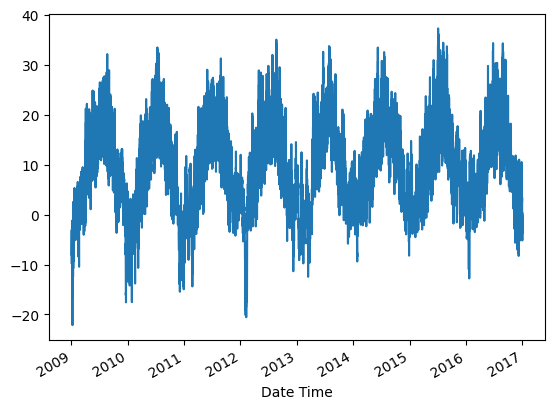

In [ ]:
temp = df['T (degC)']
temp.plot()

In [ ]:
# [[[1], [2], [3], [4], [5]]] [6]
# [[[2], [3], [4], [5], [6]]] [7]
# [[[3], [4], [5], [6], [7]]] [8]

def df_to_X_y(df, window_size=5):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

In [ ]:
WINDOW_SIZE = 5
X1, y1 = df_to_X_y(temp, WINDOW_SIZE)
X1.shape, y1.shape

((11676, 5, 1), (11676,))

In [ ]:
total_samples = len(X1)
train_split = int(total_samples * 0.7)
val_split = int(total_samples * 0.85)

X_train1, y_train1 = X1[:train_split], y1[:train_split]
X_val1, y_val1 = X1[train_split:val_split], y1[train_split:val_split]
X_test1, y_test1 = X1[val_split:], y1[val_split:]

X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((8173, 5, 1), (8173,), (1751, 5, 1), (1751,), (1752, 5, 1), (1752,))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model1 = Sequential()
model1.add(InputLayer((5, 1)))
model1.add(LSTM(64))
model1.add(Dense(8, 'relu'))
model1.add(Dense(1, 'linear'))

model1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 64)             │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 8)              │           520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,425 (68.07 KB)

 Trainable params: 17,425 (68.07 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cp1 = ModelCheckpoint('model1/model.keras', save_best_only=True)
model1.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

In [ ]:
model1.fit(X_train1, y_train1, validation_data=(X_val1, y_val1), epochs=20, callbacks=[cp1])

Epoch 1/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 7.8853 - root_mean_squared_error: 2.8080 - val_loss: 7.7023 - val_root_mean_squared_error: 2.7753
Epoch 2/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.7317 - root_mean_squared_error: 2.7801 - val_loss: 7.5451 - val_root_mean_squared_error: 2.7468
Epoch 3/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.4116 - root_mean_squared_error: 2.7223 - val_loss: 7.4030 - val_root_mean_squared_error: 2.7208
Epoch 4/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.3266 - root_mean_squared_error: 2.7064 - val_loss: 7.2880 - val_root_mean_squared_error: 2.6996
Epoch 5/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 7.0883 - root_mean_squared_error: 2.6623 - val_loss: 7.2014 - val_root_mean_squared_error: 2.6835
Epoch 6/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 6.7295 - root_mean_squared_error: 2.5937 - val_loss: 7.1730 - val_root_mean_squared_error: 2.6783
Epoch 7/20
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step 

In [ ]:
from tensorflow.keras.models import load_model
model1 = load_model('model1/model.keras')

In [ ]:
train_predictions = model1.predict(X_train1).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train1})
train_results

256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


,Train Predictions,Actuals
0,-4.395984,-3.12
1,-3.271291,-3.07
2,-3.093516,-4.71
3,-4.293780,-8.20
4,-6.824842,-5.96
...,...,...
8168,15.504290,17.93
8169,19.259596,19.50
8170,20.552927,18.24
8171,15.336430,15.26


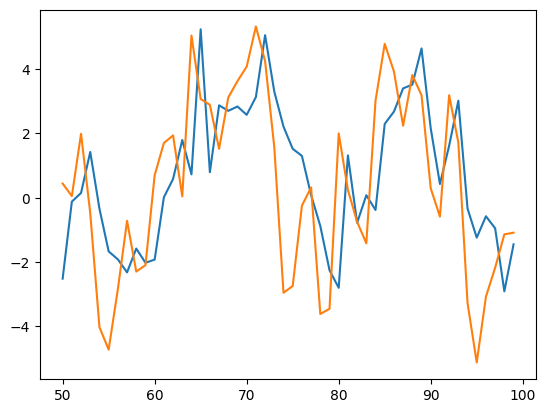

In [ ]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][50:100])
plt.plot(train_results['Actuals'][50:100])

In [ ]:
val_predictions = model1.predict(X_val1).flatten()
val_results = pd.DataFrame(data={'Val Predictions':val_predictions, 'Actuals':y_val1})
val_results

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Val Predictions,Actuals
0,16.218391,20.19
1,19.175207,20.10
2,14.813401,14.59
3,12.859756,11.89
4,18.905956,21.62
...,...,...
1746,6.041248,6.81
1747,5.875003,6.39
1748,5.794656,5.95
1749,5.920432,6.87


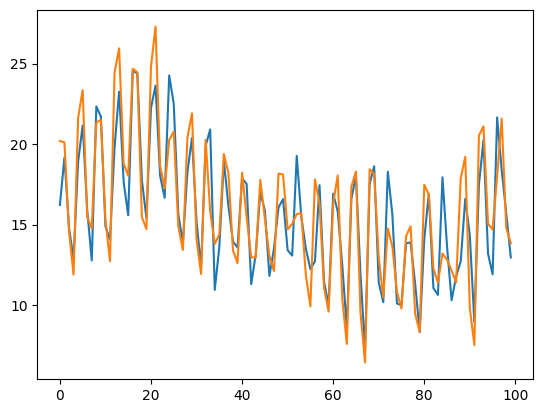

In [ ]:
plt.plot(val_results['Val Predictions'][:100])
plt.plot(val_results['Actuals'][:100])

In [ ]:
test_predictions = model1.predict(X_test1).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test1})
test_results

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


,Test Predictions,Actuals
0,6.394358,6.39
1,5.540703,5.87
2,6.337566,6.83
3,6.810135,8.26
4,7.024157,5.49
...,...,...
1747,0.729813,0.38
1748,-0.812313,-4.17
1749,-2.900524,-5.17
1750,-4.217939,-0.71


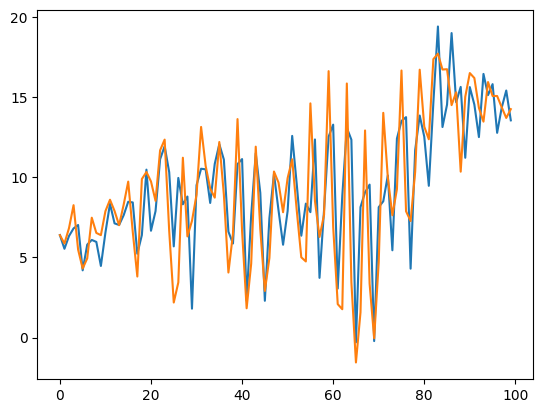

In [ ]:
plt.plot(test_results['Test Predictions'][:100])
plt.plot(test_results['Actuals'][:100])